# Story Telling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
import warnings; warnings.simplefilter('ignore')

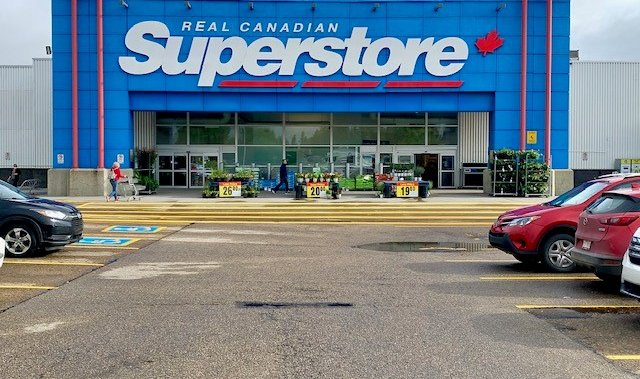

In [2]:
Image(filename='superstore-2.jpg', width=1000)

In [3]:
data=pd.read_excel('Sample_Superstore.xls')

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### This Sample_Superstore dataset contains 9994 transactions and 21 features as shown above.

### Creating the column Profi_Percentage to check the profit percentage of each product

In [5]:
data['Profit_Percentage']=(data['Profit']/data['Sales'])*100

### Checking the product segmentation distribution:

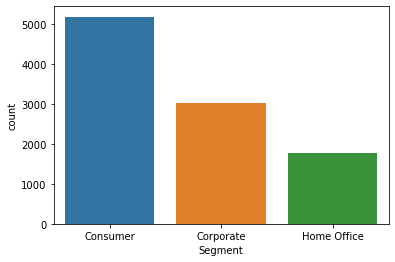

In [6]:
sns.countplot(data['Segment'])

#### This Store has three segments of business namely Consumer,Corporate and Home Office as shown in the above figure

## Creating the three different datasets for three different segments:

In [7]:
data_Consumer=data[data['Segment']=='Consumer']

In [8]:
data_Corporate=data[data['Segment']=='Corporate']

In [9]:
data_Home_Office=data[data['Segment']=='Home Office']

### Calculating Average Profit Percentage for each segment:

In [10]:
np.mean(data_Consumer['Profit_Percentage'])

11.204952133156496

In [11]:
np.mean(data_Corporate['Profit_Percentage'])

12.120260868746454

In [12]:
np.mean(data_Home_Office['Profit_Percentage'])

14.286958506103376

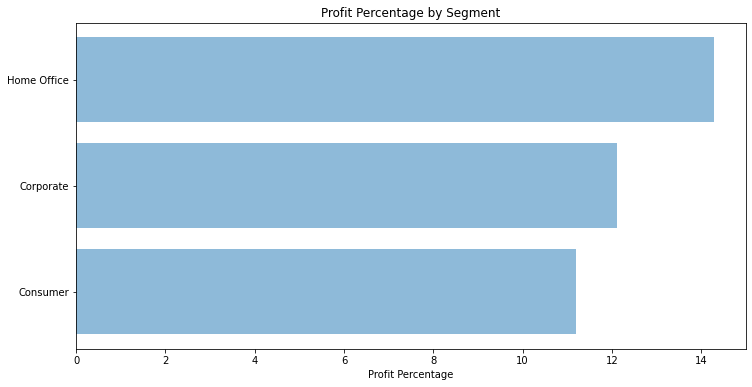

In [13]:
objects=['Consumer','Corporate','Home Office']
y_pos=np.arange(len(objects))
performance=[11.20,12.12,14.28]
plt.figure(figsize=(12,6))
plt.barh(y_pos,performance,align='center',alpha=.5)
plt.yticks(y_pos,objects)
plt.xlabel('Profit Percentage')
plt.title('Profit Percentage by Segment')
plt.show()

#### The above graph shows Home Office category has high profit and Consumer category has low profit.

### Since Consumer category showing comparitively low profit lets check the distribution of  profit percentage for Consumer Segment.

In [14]:
data_Consumer['Profit_Percentage'].describe()

count    5191.000000
mean       11.204952
std        47.846643
min      -275.000000
25%         6.250000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit_Percentage, dtype: float64

#### The min value -275 shows there are some loss by some subcatogories.

#### groupby  'Sub-Category'  to check which all the subcategories showing loss.

In [15]:
avg_profit_consumer_gb=data_Consumer.groupby('Sub-Category')['Profit_Percentage'].mean()
avg_profit_consumer_gb

Sub-Category
Accessories    20.460172
Appliances    -20.997268
Art            24.722547
Binders       -21.393269
Bookcases     -15.949371
Chairs          4.266705
Copiers        29.128571
Envelopes      41.767442
Fasteners      31.754386
Furnishings    13.325911
Labels         43.748677
Machines       -5.443191
Paper          42.588023
Phones         12.113636
Storage         8.098889
Supplies       10.577500
Tables        -15.824696
Name: Profit_Percentage, dtype: float64

Subcategories such as Appliances, Binders, ookcases, Machines, Tables showing loss.

#### Make a dataframe with the 'Profit_Percentage' as  column and groupby it by 'Sub-Category' 

In [16]:
avg_profit_consumer_df=pd.DataFrame(avg_profit_consumer_gb)
avg_profit_consumer_df

,Profit_Percentage
Sub-Category,
Accessories,20.460172
Appliances,-20.997268
Art,24.722547
Binders,-21.393269
Bookcases,-15.949371
Chairs,4.266705
Copiers,29.128571
Envelopes,41.767442
Fasteners,31.754386


#### plot Bar graph for the subcatogories profit_percentage

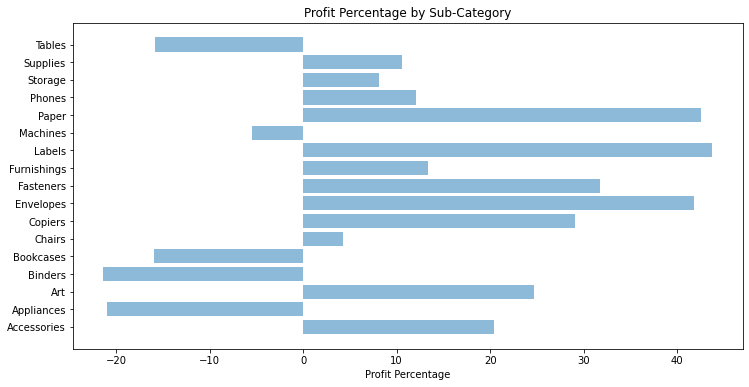

In [18]:
objects=avg_profit_consumer_df.index
y_pos=np.arange(len(objects))
performance=avg_profit_consumer_df['Profit_Percentage']
plt.figure(figsize=(12,6))
plt.barh(y_pos,performance,align='center',alpha=.5)
plt.yticks(y_pos,objects)
plt.xlabel('Profit Percentage')
plt.title('Profit Percentage by Sub-Category')
plt.show()

In the above graph Appliances, Binders, ookcases, Machines subcategories showing loss. Hence we need to take action over them.